In [104]:
import igraph as ig
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
df = pd.read_csv('data/foodWebCleaned.csv', index_col=0)

In [106]:
counts_df = df['geographic.location'].value_counts().reset_index()
counts_df.columns = ['geographic.location', 'count'] # Optional: Rename columns for clarity
print(counts_df)

                                geographic.location  count
0                                           Germany  29458
1                                               USA  18223
2             Eastern Weddell Sea Shelf, Antarctica  15618
3                                    United Kingdom  11149
4                                          Portugal   4636
5                      Ireland/West Cork/Skibbereen   4508
6             Florida Key islands, Florida Bay, USA   2583
7                       Switzerland, Lake Neuchatel   2400
8   Puerto Rico-Virgin Islands (PRVI) shelf complex   1989
9      Tributaries of the Taieri River, New Zealand   1482
10                                      Brasil (CE)   1459
11                   Santa Barbara, California, USA   1138
12                        Arctic Shelf Area, Arctic   1065
13                                          Iceland    707
14                                           Canada    706
15                                       Mozambique    6

In [108]:
location = 'Brasil (CE)'
for loc in df['geographic.location'].unique():
    df_location = df[df['geographic.location'] == loc]
    df_location.to_csv(f'data/dfs_locais/{loc.replace('/', ' ')}.csv')

In [ ]:
df_location = df[df['geographic.location'] == location]
len(df_location)

1459

In [ ]:
df_edges = df_location.dropna(subset=['con.taxonomy', 'res.taxonomy'])
edges = list(zip(df_edges['res.taxonomy'], df_edges['con.taxonomy']))
g = ig.Graph.TupleList(edges, directed=True)

vlist = g.vs()
list_sorted = sorted(vlist, key=lambda v: v['name'])

print(f"{'Species':<20} | {'Eats (In)':<10} | {'Eaten By (Out)':<10}")
print("-" * 45)

for v in g.vs():
    # indegree = number of prey (energy coming in)
    # outdegree = number of predators (energy going out)
    print(f"{v['name']:<20} | {v.indegree():<10} | {v.outdegree():<10}")

Species              | Eats (In)  | Eaten By (Out)
---------------------------------------------
Bryopsis plumosa     | 0          | 10        
Eulithidium affine   | 163        | 8         
Tegula viridula      | 129        | 3         
Eriphia gonagra      | 78         | 7         
Pomacanthus paru     | 18         | 0         
Abudefduf saxatilis  | 27         | 0         
Pachygrapsus transversus | 99         | 8         
Ischnochiton striolatus | 56         | 2         
Menippe nodifrons    | 39         | 4         
Engina turbinella    | 55         | 8         
Clibanarius antillensis | 121        | 2         
Caulerpa racemosa    | 0          | 52        
Caulerpa prolifera   | 0          | 45        
Caulerpa scalpelliformis | 0          | 67        
Codium decorticatum  | 0          | 10        
Valonia aegagropila  | 0          | 45        
Ulva lactuca         | 0          | 104       
Dictyopteris delicatula | 0          | 26        
Lobophora variegata  | 0          | 46  

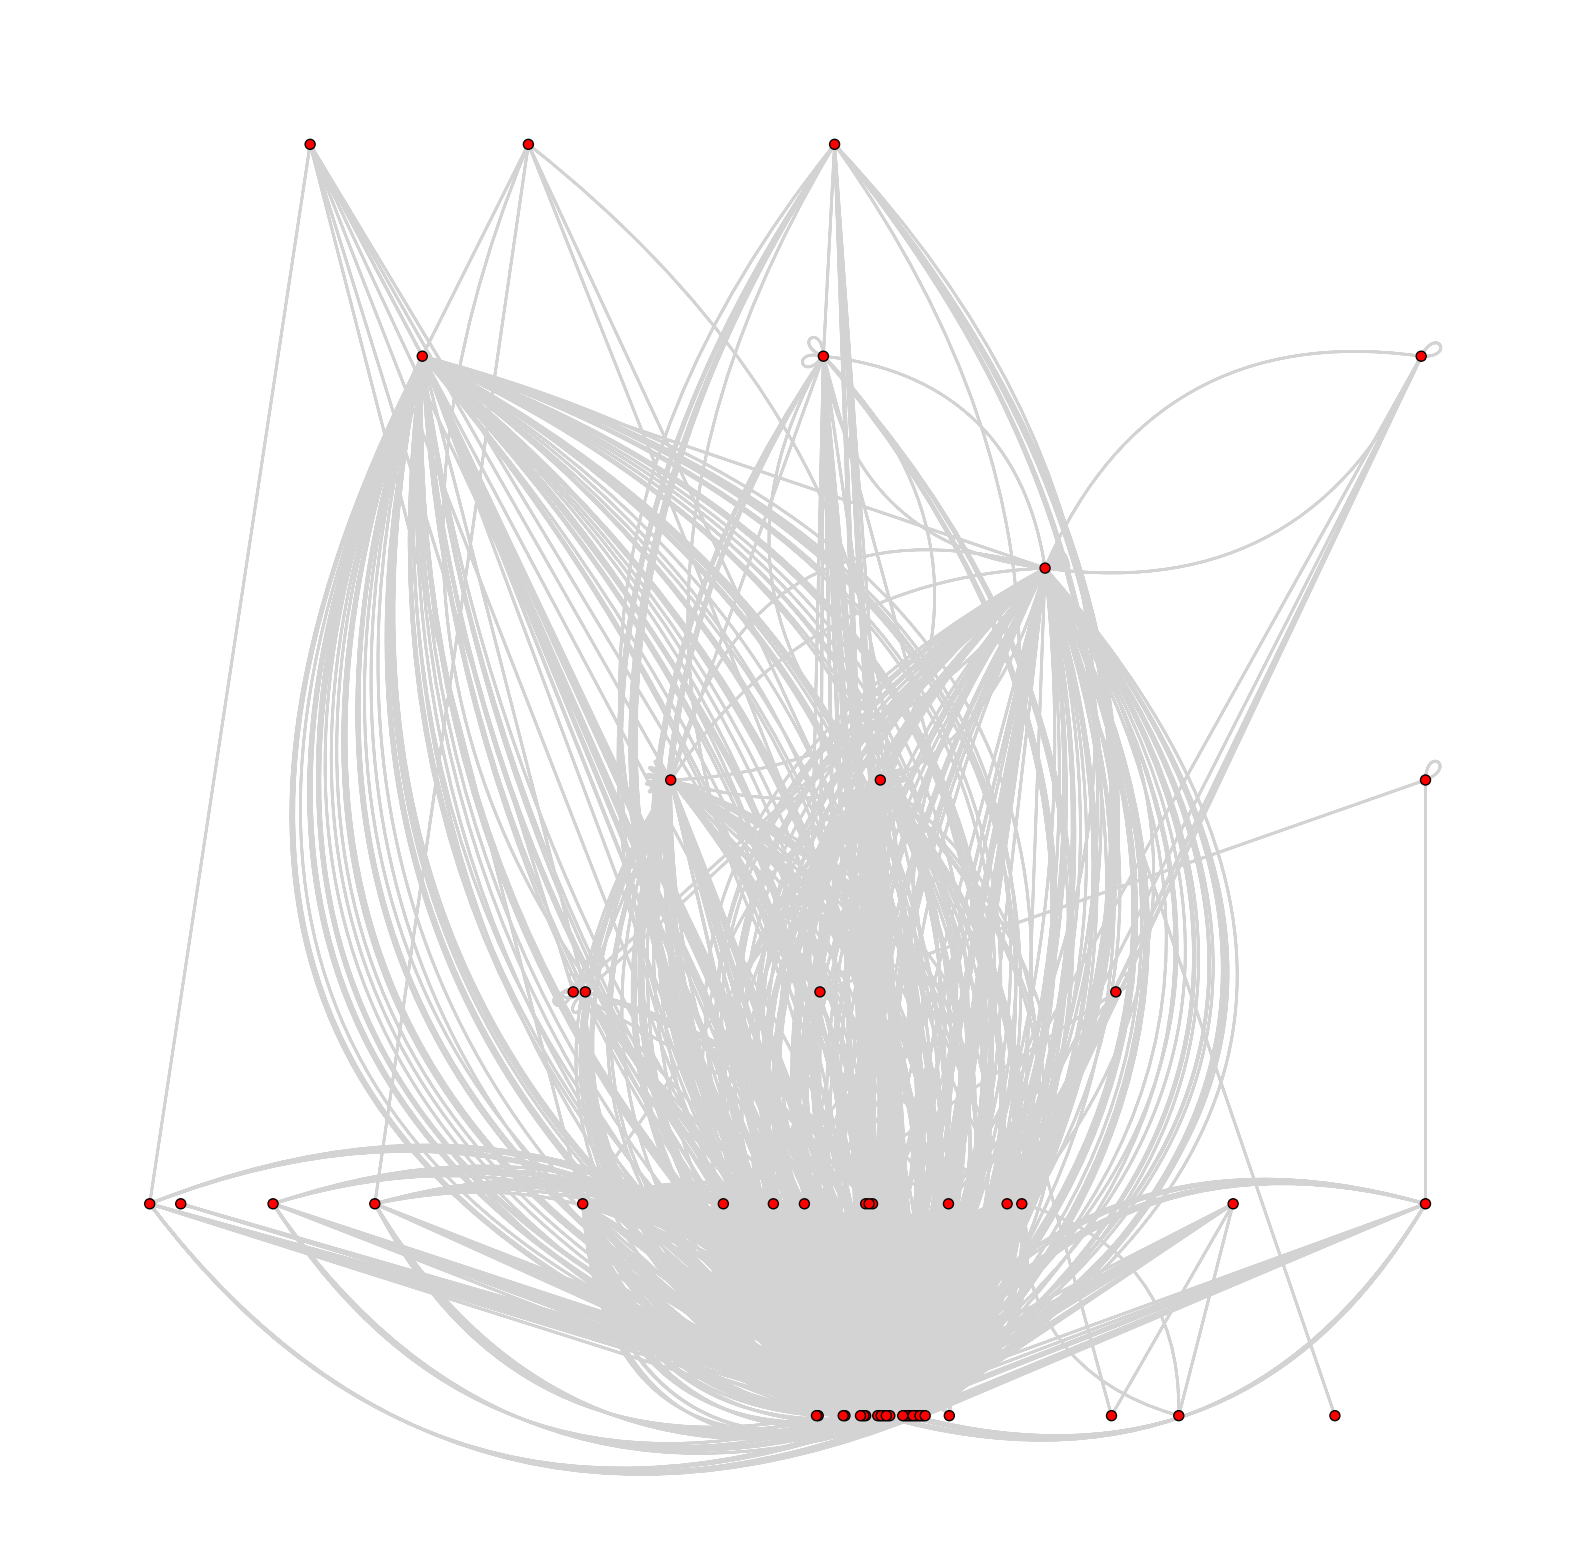

In [ ]:
layout = g.layout(layout=ig.Graph.layout_sugiyama)

fig, ax = plt.subplots(figsize=(20,20))

ig.plot(g,
        target=ax,
        layout=layout,
        vertex_size= 10,
        edge_width=2,
        edge_color='lightgray',
        edge_arrow_size=1,
        edge_arrow_width=1,
    )
plt.show()
